In [1]:
import nltk
from nltk.book import *
import matplotlib.pyplot as plt
import tkinter
import re

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [12]:
nltk.download("popular")
nltk.download("nps_chat")
nltk.download("webtext")
nltk.download('gutenberg')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to data/nlp_uni/...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to data/nlp_uni/...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to data/nlp_uni/...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to data/nlp_uni/...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to data/nlp_uni/...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to data/nlp_uni/...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to data/nlp_uni/...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to data/nlp_uni/...
[nltk_data]    |   Unzipping corpora/shak

True

## T1

In [2]:
p = 3 % 8
p

3

In [3]:
freq_dist = nltk.FreqDist(text3)

In [4]:
rare_words = []

for key, value in freq_dist.items():
    if value < 5:
        rare_words.append(key)

In [5]:
len(rare_words), freq_dist[rare_words[0]], rare_words[:5]

(1994, 1, ['form', 'void', 'darkness', 'Spirit', 'moved'])

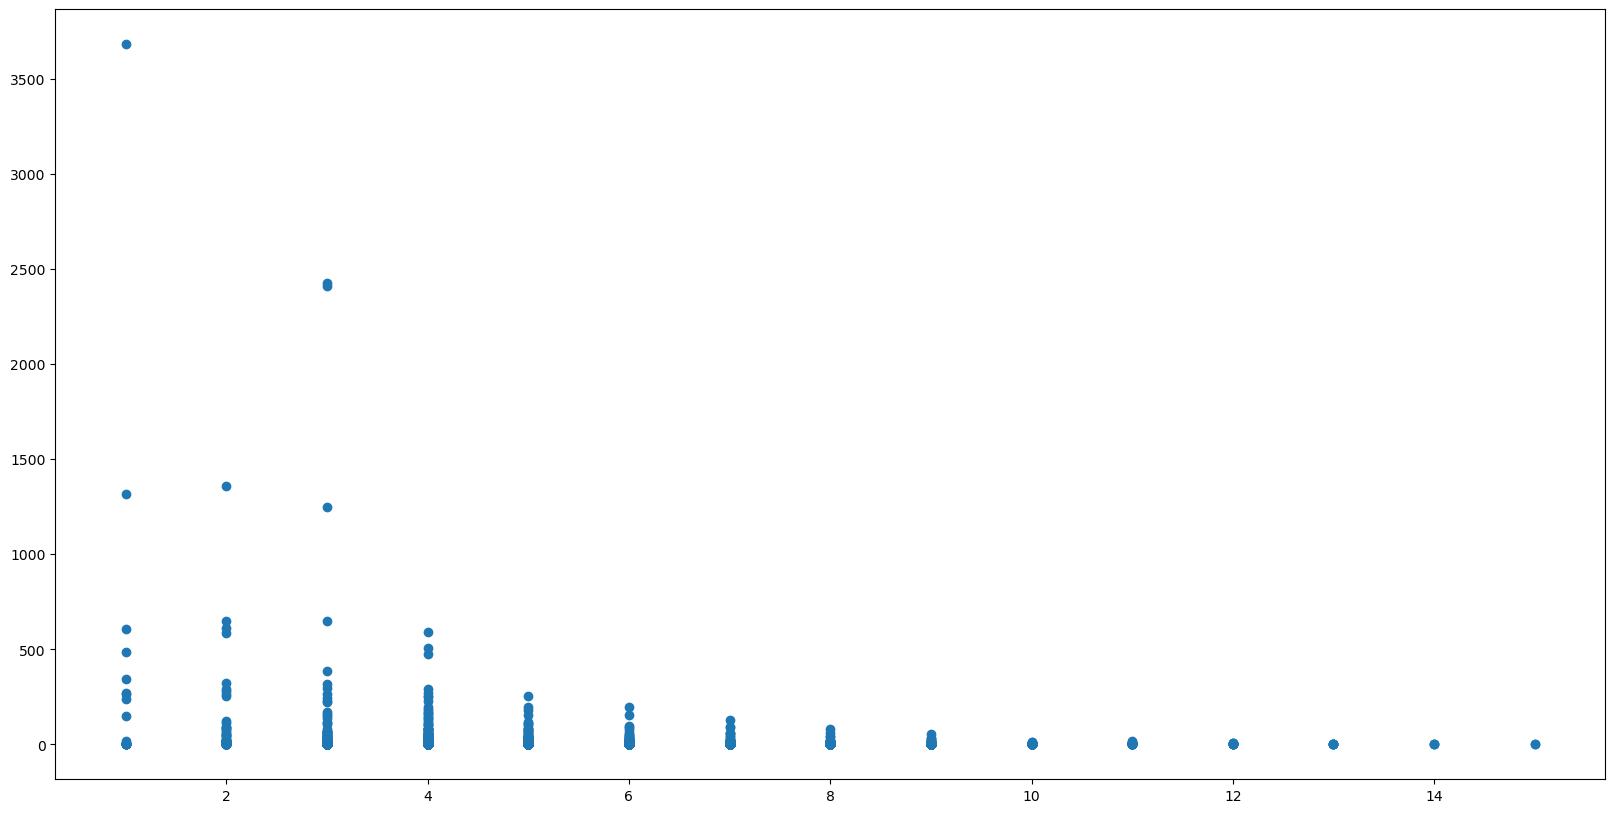

In [6]:
word_len = [len(word) for word in freq_dist.keys()]

plt.figure(figsize=(20, 10))

plt.scatter(word_len, freq_dist.values())
plt.show()

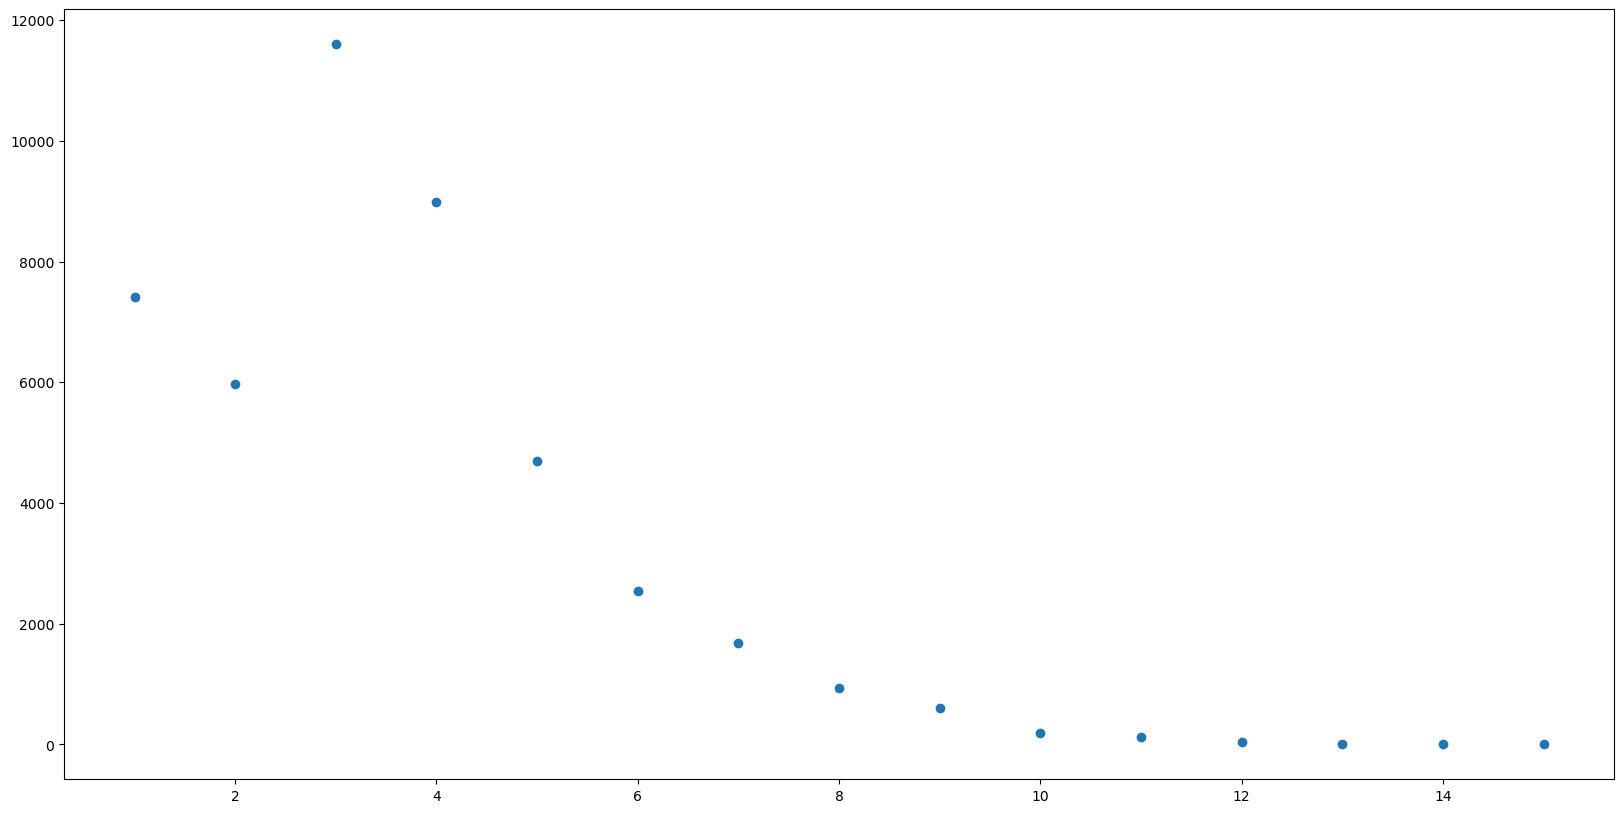

In [7]:
len_freq_dist = {}

for key, value in freq_dist.items():
    len_freq_dist[len(key)] = len_freq_dist.get(len(key), 0) + value
    
plt.figure(figsize=(20, 10))

plt.scatter(len_freq_dist.keys(), len_freq_dist.values())
plt.show()

In [8]:
freq_dist_eos = nltk.FreqDist(re.findall("(\w*) [.!?]", " ".join(text3.tokens)))

In [9]:
sorted(freq_dist_eos.items(), key=lambda x: x[1], reverse=True)[:10]

[('him', 58),
 ('me', 38),
 ('thee', 33),
 ('earth', 31),
 ('them', 25),
 ('son', 25),
 ('wife', 20),
 ('it', 19),
 ('Egypt', 18),
 ('day', 15)]

## T2

In [10]:
!pip install PyPDF2

In [11]:
import PyPDF2


def extract_text_from_pdf(pdf_path):
    text = ''
    with open(pdf_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        for page in pdf_reader.pages:
            text += page.extract_text()
    return text

In [12]:
raw = extract_text_from_pdf("Shelley-1818 Frankenstein.pdf")
raw[:100]

'Mary Wollstonecraft Shelley (UK: /ˈwʊlstənkrɑːft/, US: /-kræft/; née Godwin; 30 August 1797 \n– 1 Feb'

In [13]:
tokens = nltk.word_tokenize(raw)
text = nltk.Text(tokens)

In [14]:
text

<Text: Mary Wollstonecraft Shelley ( UK : /ˈwʊlstənkrɑːft/ ,...>

In [15]:
text.concordance_list("entity", width=20, lines=2)

[ConcordanceLine(left=['to', 'a', 'living', ',', 'thinking'], query='entity', right=['as', 'an', 'act', 'of'], offset=32832, left_print='inking', right_print='as an ', line='inking entity as an '),
 ConcordanceLine(left=['proper', 'controls', ',', 'such', 'an'], query='entity', right=['could', 'destroy', 'everything', 'on'], offset=120170, left_print='uch an', right_print='could ', line='uch an entity could ')]

In [16]:
text.similar("monster", num=3)

creature murderer man


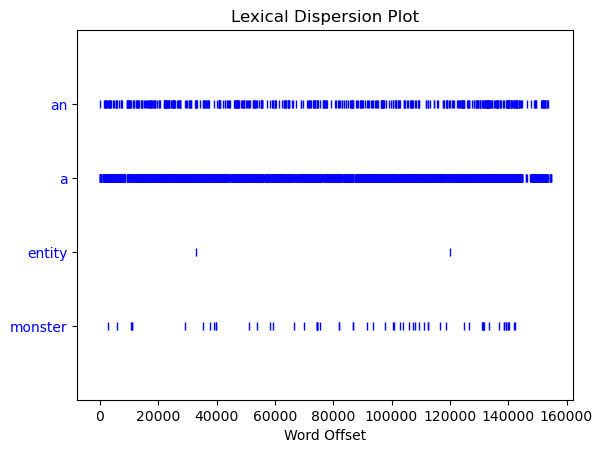

In [17]:
text.dispersion_plot(["an", "a", "entity", "monster"])

In [18]:
sorted(nltk.FreqDist(text).items(), key=lambda x: x[1], reverse=True)[:100]

[(',', 9311),
 ('the', 7032),
 ('.', 5032),
 ('of', 4844),
 ('and', 4788),
 ('to', 3479),
 ('I', 2992),
 ('a', 2406),
 ('in', 2005),
 ('that', 1795),
 ('my', 1653),
 (';', 1540),
 ('was', 1239),
 ('his', 1122),
 ('is', 1080),
 ('with', 999),
 ('as', 955),
 ('for', 930),
 ('“', 918),
 ('not', 894),
 ('he', 874),
 ('’', 855),
 ('me', 823),
 ('had', 784),
 ('by', 778),
 ('it', 739),
 ('”', 722),
 ('but', 712),
 ('which', 704),
 ('s', 699),
 ('on', 675),
 ('you', 627),
 ('be', 615),
 ('from', 607),
 ('this', 590),
 ('have', 576),
 ('The', 558),
 ('?', 551),
 (')', 528),
 ('(', 527),
 (':', 524),
 ('Victor', 519),
 ('or', 515),
 ('her', 493),
 ('at', 481),
 ('an', 443),
 ('creature', 402),
 ('when', 389),
 ('are', 377),
 ('were', 373),
 ('we', 337),
 ('him', 333),
 ('one', 329),
 ('can', 319),
 ('so', 304),
 ('who', 303),
 ('Mary', 302),
 ('would', 291),
 ('your', 287),
 ('life', 266),
 ('more', 263),
 ('she', 261),
 ('their', 261),
 ('they', 261),
 ('all', 259),
 ('been', 252),
 ('what', 2

## T3

In [19]:
amounts = re.findall(r"\d+(?:,\d+)*(?:\.\d+)?", raw)

In [20]:
amounts = list(map(lambda x: float(x.replace(",", "")), amounts))
sum(amounts)

9784318888648.035

## T4

In [173]:
text_tmp = '''{
"HTTPHost”: ”localhost”,
”HTTPPort”: 8545,
”Config”: {
    ”Enabled”: true,
    ”Server”: ”wakuv2.prod” ,
    ”Nodes”: [”8.210.222.231”, ”168.166.125.145”, ”8.210.222.231”, ”168.166.125.145”, ”8.210.222.231”]
}
}'''

In [31]:
print(text_tmp)

{
"HTTPHost”: ”localhost”,
”HTTPPort”: 8545,
”Config”: {
    ”Enabled”: true,
    ”Server”: ”wakuv2.prod” ,
    ”Nodes”: [”8.210.222.231”, ”168.166.125.145”]
}
}


In [190]:
re.findall(r'”Nodes”: \[.*\]', text_tmp)

['”Nodes”: [”8.210.222.231”, ”168.166.125.145”, ”8.210.222.231”, ”168.166.125.145”, ”8.210.222.231”]']

In [194]:
print(re.sub(r'”Nodes”: \[.*\]', re.sub(r'”8\..*?”,?\s*|,?\s*”8\..*?”', '', *re.findall(r'”Nodes”: \[.*\]', text_tmp)), text_tmp))

{
"HTTPHost”: ”localhost”,
”HTTPPort”: 8545,
”Config”: {
    ”Enabled”: true,
    ”Server”: ”wakuv2.prod” ,
    ”Nodes”: [”168.166.125.145”, ”168.166.125.145”]
}
}


In [187]:
print(re.sub(r'(”Server”:\s*)”(\w*)\.(\w*)” ', '\g<1>{”name”: ”\g<2>”, ”type”: ”\g<3>”}', text_tmp))

{
"HTTPHost”: ”localhost”,
”HTTPPort”: 8545,
”Config”: {
    ”Enabled”: true,
    ”Server”: {”name”: ”wakuv2”, ”type”: ”prod”},
    ”Nodes”: [”8.210.222.231”, ”168.166.125.145”, ”8.210.222.231”, ”168.166.125.145”, ”8.210.222.231”]
}
}
